# Projeto (beta) - Medical Task Force

#### PERGUNTAS GERAIS: 

<ol> 
    <li> qual é a situação do nr de leitos no Brasil</li>
    <li> quanto a quantidade de leitos afeta a população?</li>
</ol>

#### PERGUNTAS UM POUCO  AFINADAS:
Verificar a distância entre as cidades que possuem leitos e as que não possuem:
<ul>
    <li>cidades que não tem leitos de UTI: quanto maior a distância de uma cidade que possui leitos aumenta a taxa de  mortalidade?</li>
    <li>ou seja: a relação distância entre as cidades que possuem e não possuem leitos É DIRETAMENTE PROPORCIONAL a taxa de mortalidade? </li>
    </ul>
    		
Dividir as cidades em 2 grupos: 
<ul> 
    <li>cidades com leitos = 0 </li>
    <li>cidades com leitos = tem  1 ou mais leitos </li>
</ul>
Depois verificar a condição destes dois grupos de cidades com relação a taxa de mortes 



In [4]:
#import das libraries que serão utilizadas
import pandas as pd
import numpy as np

In [6]:
# Importd o arquivo de dados
dfDados = pd.read_csv('./data/DadosConsolidados.csv', delimiter=";", encoding='latin-1')
#definindo os indexes:
dfDados = dfDados.set_index('Codigo_Municipio')
dfDados

Nome_municipio     Nome_Estado        Região  \
Codigo_Municipio                                                      
5200050               Abadia de Goiás           Goiás  Centro-Oeste   
3100104           Abadia dos Dourados    Minas Gerais       Sudeste   
5200100                     Abadiânia           Goiás  Centro-Oeste   
3100203                        Abaeté    Minas Gerais       Sudeste   
1500107                    Abaetetuba            Pará         Norte   
...                               ...             ...           ...   
2933604                   Xique-Xique           Bahia      Nordeste   
2517407                        Zabelê         Paraíba      Nordeste   
3557154                      Zacarias       São Paulo       Sudeste   
2114007                       Zé Doca        Maranhão      Nordeste   
4219853                        Zortéa  Santa Catarina           Sul   

                  Pop_Total  Total_Obitos  Total_Medicos  Total_Enfermeiros  \
Codigo_Municipio                                                              
5200050                8773             0             16                 10   
3100104                6989             0             14                  4   
5200100               20042             0             16                 19   
3100203               23237             0             51                 15   
1500107              157698             0             90                 81   
...                     ...           ...            ...                ...   
2933604               46483             0             12                 26   
2517407                2240             0              1                  2   
3557154                2718             0              0                  5   
2114007               51714             0             13                 30   
4219853                3363             0              0                  2   

                  Total_Fisio_Respiratoria  Total_Fisio_Geral  \
Codigo_Municipio                                                
5200050                                  0                  4   
3100104                                  0                 15   
5200100                                  0                 11   
3100203                                  0                 87   
1500107                                  0                 20   
...                                    ...                ...   
2933604                                  0                  7   
2517407                                  0                 10   
3557154                                  0                 41   
2114007                                  0                  5   
4219853                                  0                  5   

                  Total_Profissionais_Saude  Total_Leitos_UTI  \
Codigo_Municipio                                                
5200050                                  30                 0   
3100104                                  33                 0   
5200100                                  46                 0   
3100203                                 153                 0   
1500107                                 191                 0   
...                                     ...               ...   
2933604                                  45                 0   
2517407                                  13                 0   
3557154                                  46                 0   
2114007                                  48                 0   
4219853                                   7                 0   

                  Total_Respiradores  Obitos_Por100mil  Medicos_Por100mil  \
Codigo_Municipio                                                            
5200050                            0               0.0              182.4   
3100104                            0               0.0              200.3   
5200100                            0               0.0               79

In [7]:
# Da fase de Análise Exploratória manter a normalização dos dados para 100mil habitantes
dfDados['Obitos_Por100mil'] = (dfDados['Total_Obitos'] * 100000) / dfDados['Pop_Total']
dfDados['Medicos_Por100mil'] = (dfDados['Total_Medicos'] * 100000) / dfDados['Pop_Total']
dfDados['Enfermeiros_Por100mil'] = (dfDados['Total_Enfermeiros'] * 100000) / dfDados['Pop_Total']
dfDados['FisioResp_Por100mil'] = (dfDados['Total_Fisio_Respiratoria'] * 100000) / dfDados['Pop_Total']
dfDados['FisioGeral_Por100mil'] = (dfDados['Total_Fisio_Geral'] * 100000) / dfDados['Pop_Total']
dfDados['Profissionais_Por100mil'] = (dfDados['Total_Profissionais_Saude'] * 100000) / dfDados['Pop_Total']
dfDados['LeitosUTI_Por100mil'] = (dfDados['Total_Leitos_UTI'] * 100000) / dfDados['Pop_Total']
dfDados['Respiradores_Por100mil'] = (dfDados['Total_Respiradores'] * 100000) / dfDados['Pop_Total']

dfDados

Nome_municipio     Nome_Estado        Região  \
Codigo_Municipio                                                      
5200050               Abadia de Goiás           Goiás  Centro-Oeste   
3100104           Abadia dos Dourados    Minas Gerais       Sudeste   
5200100                     Abadiânia           Goiás  Centro-Oeste   
3100203                        Abaeté    Minas Gerais       Sudeste   
1500107                    Abaetetuba            Pará         Norte   
...                               ...             ...           ...   
2933604                   Xique-Xique           Bahia      Nordeste   
2517407                        Zabelê         Paraíba      Nordeste   
3557154                      Zacarias       São Paulo       Sudeste   
2114007                       Zé Doca        Maranhão      Nordeste   
4219853                        Zortéa  Santa Catarina           Sul   

                  Pop_Total  Total_Obitos  Total_Medicos  Total_Enfermeiros  \
Codigo_Municipio                                                              
5200050                8773             0             16                 10   
3100104                6989             0             14                  4   
5200100               20042             0             16                 19   
3100203               23237             0             51                 15   
1500107              157698             0             90                 81   
...                     ...           ...            ...                ...   
2933604               46483             0             12                 26   
2517407                2240             0              1                  2   
3557154                2718             0              0                  5   
2114007               51714             0             13                 30   
4219853                3363             0              0                  2   

                  Total_Fisio_Respiratoria  Total_Fisio_Geral  \
Codigo_Municipio                                                
5200050                                  0                  4   
3100104                                  0                 15   
5200100                                  0                 11   
3100203                                  0                 87   
1500107                                  0                 20   
...                                    ...                ...   
2933604                                  0                  7   
2517407                                  0                 10   
3557154                                  0                 41   
2114007                                  0                  5   
4219853                                  0                  5   

                  Total_Profissionais_Saude  ...  Medicos_Por100mil  \
Codigo_Municipio                             ...                      
5200050                                  30  ...         182.377750   
3100104                                  33  ...         200.314780   
5200100                                  46  ...          79.832352   
3100203                                 153  ...         219.477557   
1500107                                 191  ...          57.071111   
...                                     ...  ...                ...   
2933604                                  45  ...          25.815890   
2517407                                  13  ...          44.642857   
3557154                                  46  ...           0.000000   
2114007                                  48  ...          25.138260   
4219853                                   7  ...           0.000000   

                  Enfermeiros_Por100mil  FisioResp_Por100mil  \
Codigo_Municipio                                               
5200050                      113.986094                  0.0   
3100104                       57.232794                  0.0   
5200100                       94.800918      

In [8]:
#limitando as colunas que serão analisadas neste momento
df = dfDados[['Pop_Total', 'Total_Obitos', 'Obitos_Por100mil', 'Medicos_Por100mil', 'Enfermeiros_Por100mil' , 'FisioResp_Por100mil', 'FisioGeral_Por100mil']]
#df = dfDados[['Pop_Total']]
df

Pop_Total  Total_Obitos  Obitos_Por100mil  \
Codigo_Municipio                                              
5200050                8773             0               0.0   
3100104                6989             0               0.0   
5200100               20042             0               0.0   
3100203               23237             0               0.0   
1500107              157698             0               0.0   
...                     ...           ...               ...   
2933604               46483             0               0.0   
2517407                2240             0               0.0   
3557154                2718             0               0.0   
2114007               51714             0               0.0   
4219853                3363             0               0.0   

                  Medicos_Por100mil  Enfermeiros_Por100mil  \
Codigo_Municipio                                             
5200050                  182.377750             113.986094   
3100104                  200.314780              57.232794   
5200100                   79.832352              94.800918   
3100203                  219.477557              64.552223   
1500107                   57.071111              51.364000   
...                             ...                    ...   
2933604                   25.815890              55.934428   
2517407                   44.642857              89.285714   
3557154                    0.000000             183.958793   
2114007                   25.138260              58.011370   
4219853                    0.000000              59.470711   

                  FisioResp_Por100mil  FisioGeral_Por100mil  
Codigo_Municipio                                             
5200050                           0.0             45.594437  
3100104                           0.0            214.622979  
5200100                           0.0             54.884742  
3100203                           0.0            374.402892  
1500107                           0.0             12.682469  
...                               ...                   ...  
2933604                           0.0             15.059269  
2517407                           0.0            446.428571  
3557154                           0.0           1508.462104  
2114007                           0.0              9.668562  
4219853                           0.0            148.676777  

[5570 rows x 7 columns]

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline #usar esse comando para não precisar dar plt.show em cada gráfico

df.describe()

Pop_Total  Total_Obitos  Obitos_Por100mil  Medicos_Por100mil  \
count  5.570000e+03   5570.000000       5570.000000        5570.000000   
mean   3.772839e+04      2.286176          0.530101          82.056853   
std    2.214581e+05     47.310412          3.070993          83.556997   
min    7.810000e+02      0.000000          0.000000           0.000000   
25%    5.446500e+03      0.000000          0.000000          36.999964   
50%    1.163100e+04      0.000000          0.000000          59.375165   
75%    2.549050e+04      0.000000          0.000000         100.082360   
max    1.225202e+07   2420.000000         93.719959        2770.705407   

       Enfermeiros_Por100mil  FisioResp_Por100mil  FisioGeral_Por100mil  
count            5570.000000          5570.000000           5570.000000  
mean               93.889039             0.186152            209.910111  
std                47.203000             3.814937            473.557062  
min                 0.000000             0.000000              0.000000  
25%                63.324858             0.000000             31.668182  
50%                84.488739             0.000000            126.393429  
75%               113.242269             0.000000            281.690141  
max               503.868078           234.100663          27133.436773

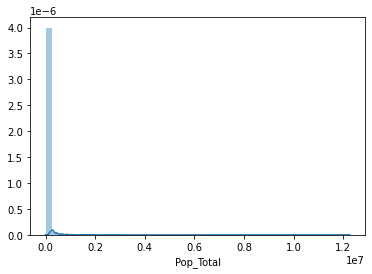

In [10]:
#o gráfico distplot mostra a combinação de um histograma com a linha do KDE
sns.distplot(df['Pop_Total'])
#sns.distplot(df['Pop_Total'], kde=False) #Para não ver a linha do KDE no gráfico use o parâmetro 'kde' igual a 'False', que por padrão é igual a 'True'


In [ ]:
#sns.boxplot(x='Pop_Total', y='Obitos_Por100mil', data=df)
#sns.boxplot(x='Pop_Total', y='Obitos_Por100mil', data=df, hue='Medicos_Por100mil')
#sns.boxplot(x='Pop_Total', y='Medicos_Por100mil', data=df)

In [ ]:
#Alguns outros gráficos que mostram a distribuição dos dados são stripplot e o swarmplot
#o  parâmetro hue subdivide o grafico
sns.stripplot(x='Pop_Total', y='Obitos_Por100mil', data=df)
#sns.stripplot(x='Gender', y='Age', data=df, hue='Type', split=True)
#sns.swarmplot(x='Gender', y='Age', data=df)